In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean

In [2]:
#dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train_x  = train.drop(['disease','id'],axis=1)
train_y = train['disease']
test_x = test.copy().drop(['id'],axis=1)

#labelencording 
Gender_dic = {'Male':0,'Female':1}
train_x['Gender'] = train_x['Gender'].map(Gender_dic)
test_x['Gender'] = test_x['Gender'].map(Gender_dic)

#fill NaN
mean = train_x['AG_ratio'].mean()
train_x['AG_ratio']=train_x['AG_ratio'].replace('NaN',np.nan)
train_x['AG_ratio']=train_x['AG_ratio'].fillna(mean)

In [3]:
train_x['AG_ratio'].unique()

array([1.01      , 1.36      , 0.96      , 1.31      , 1.04      ,
       0.64      , 0.81      , 1.43      , 1.21      , 1.5       ,
       0.7       , 0.82      , 1.28      , 1.17      , 0.99      ,
       1.38      , 0.85      , 1.11      , 1.34      , 0.75      ,
       0.97      , 0.86      , 0.71      , 1.18      , 1.24      ,
       0.49      , 1.12      , 0.99785795, 1.22      , 1.1       ,
       0.9       , 0.58      , 0.91      , 1.14      , 1.        ,
       0.57      , 0.53      , 0.79      , 1.08      , 1.06      ,
       1.15      , 0.69      , 1.19      , 0.84      , 1.09      ,
       1.23      , 0.93      , 1.02      , 1.03      , 0.37      ,
       1.4       , 1.39      , 0.78      , 1.26      , 0.95      ,
       1.46      , 0.52      , 0.83      , 0.74      , 0.92      ,
       1.05      , 0.5       , 1.8       , 1.16      , 1.27      ,
       0.42      , 0.56      , 0.43      , 2.54      , 0.8       ,
       0.62      , 1.29      , 0.6       , 1.07      , 1.3    

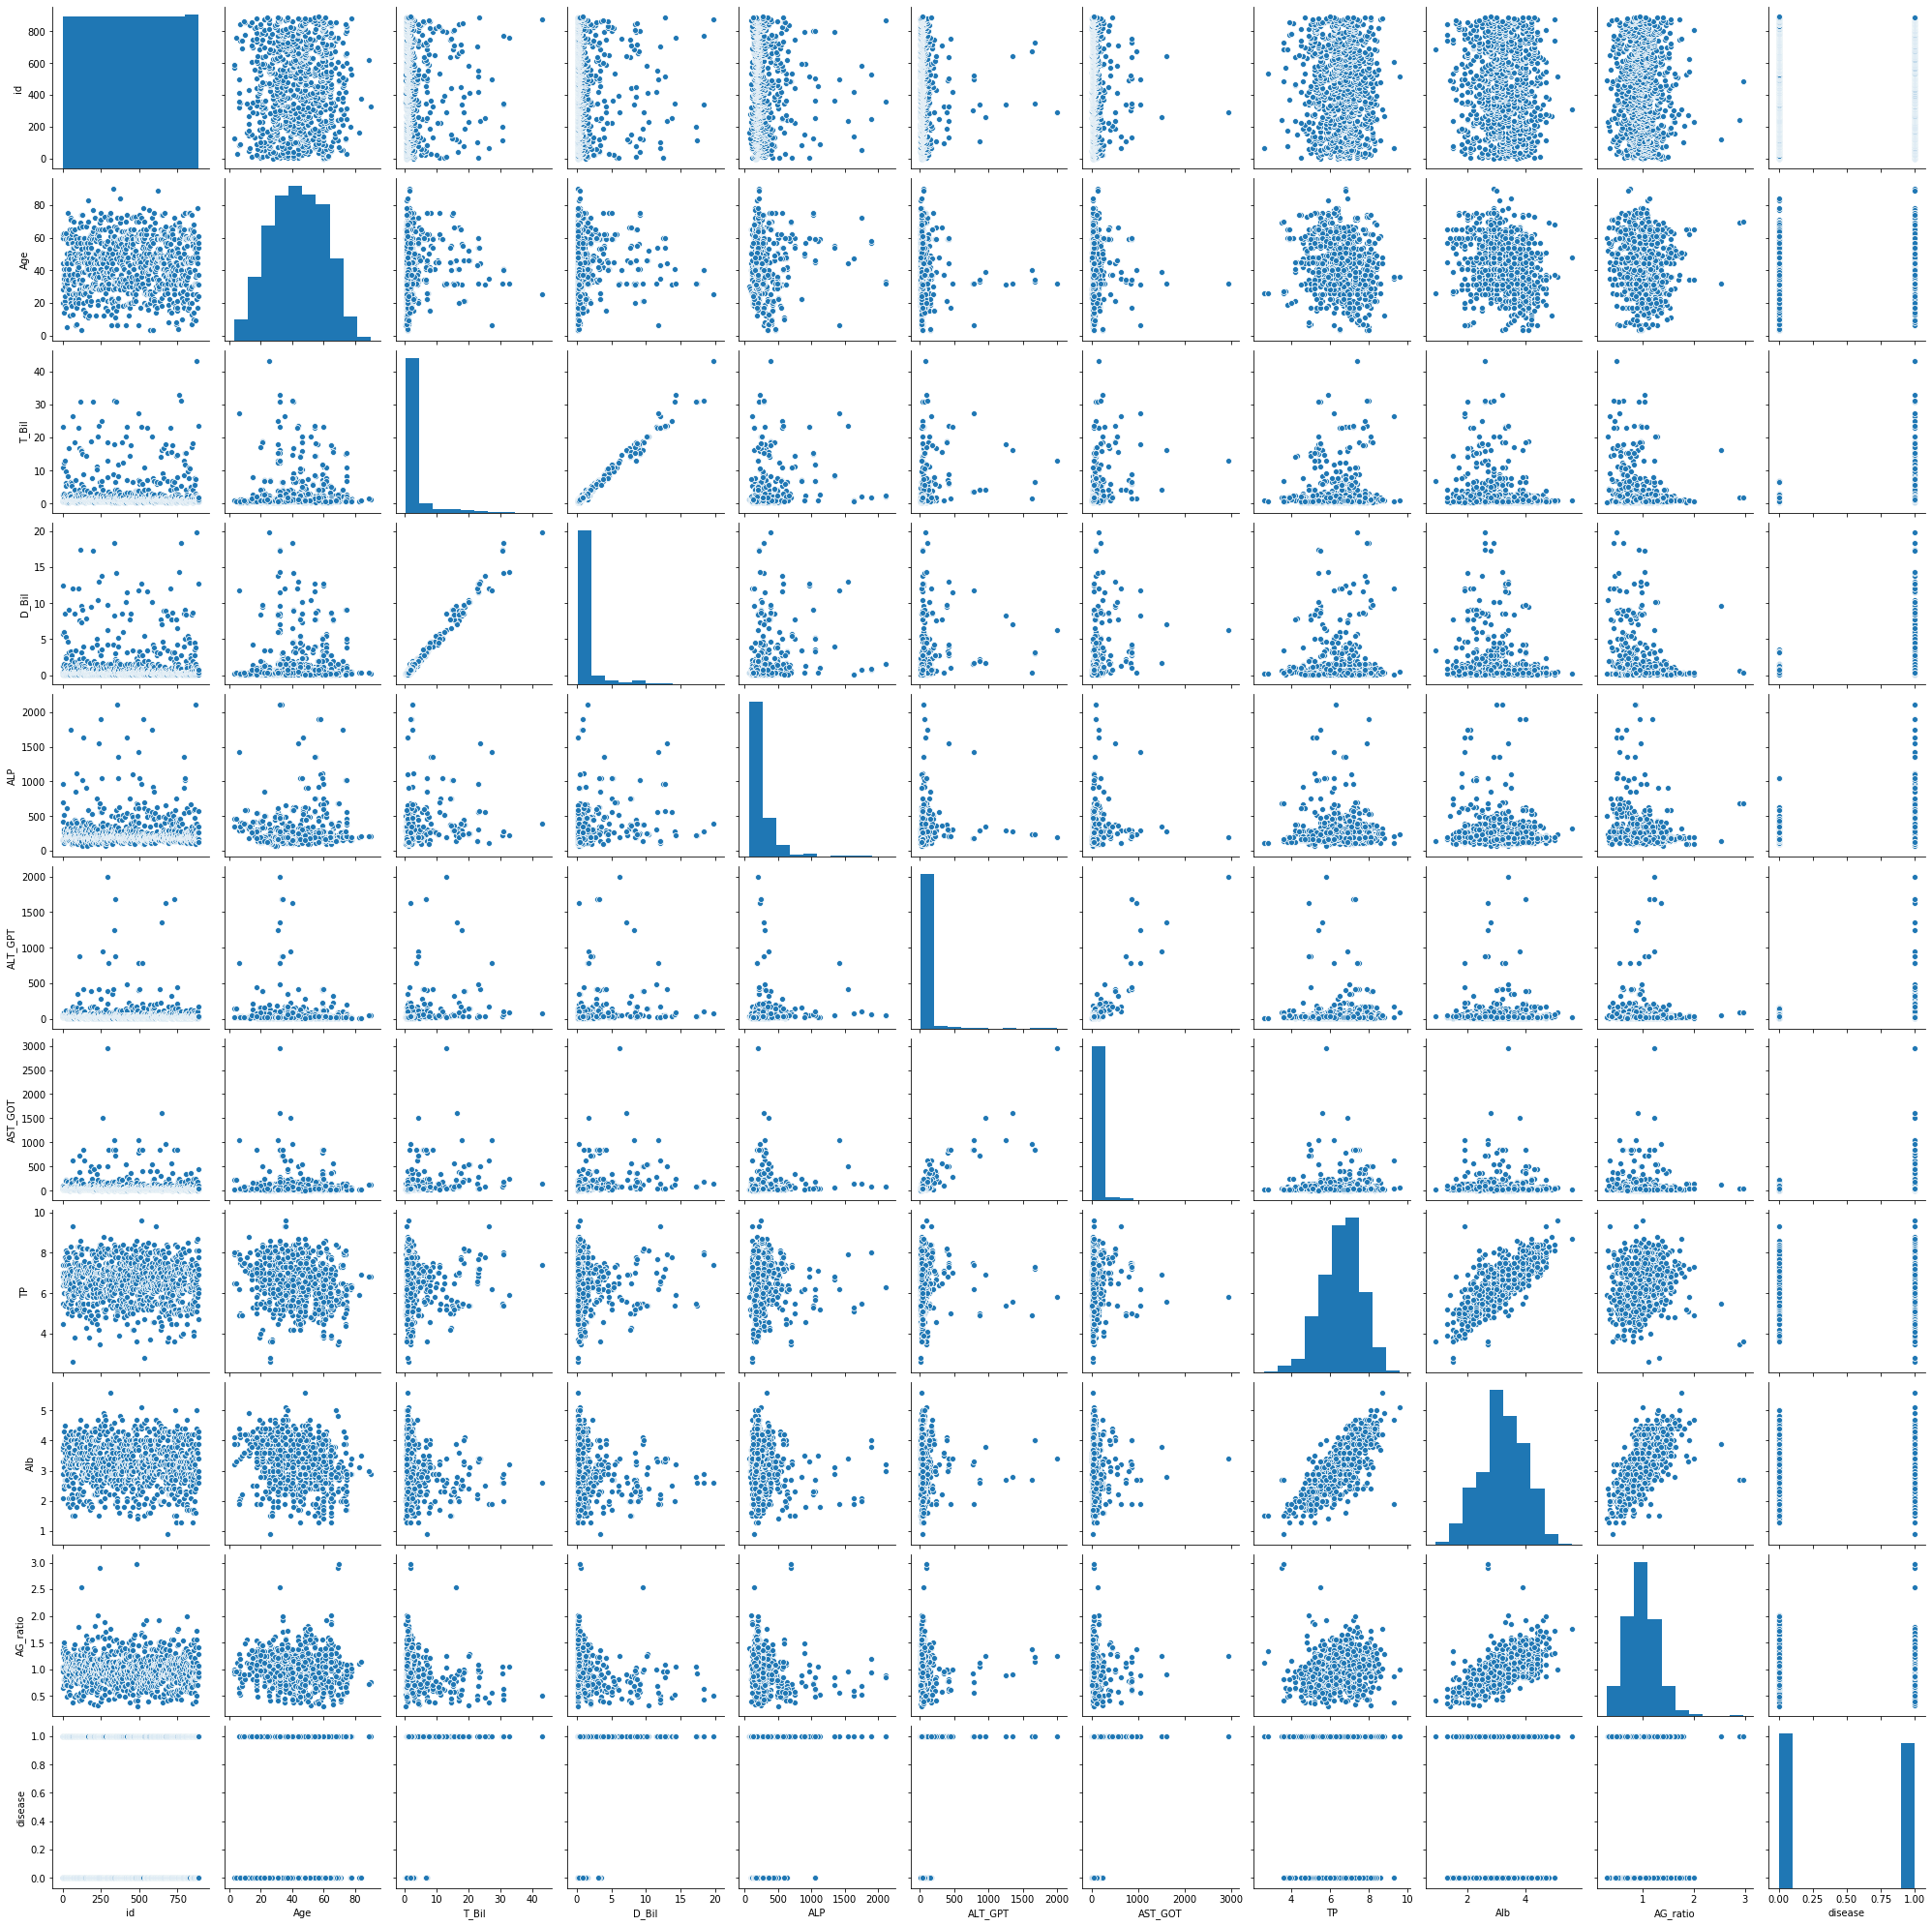

In [4]:
sns.pairplot(train)

In [13]:
#model->xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=20,random_state=71)
xgb.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=71,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [25]:
y_pred_xgb = xgb.predict(test_x)
y_pred_xgb

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,

In [14]:
#model->randomforest
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=30,n_estimators=30,random_state=42)
rf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [16]:
y_pred_rf = rf.predict(test_x)
y_pred_rf

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,

In [26]:
#クロスバリデーション(rf.ver)
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import KFold

#各Foldのスコアを保存するリスト
scores_accuracy = []
scores_logloss = []

kf = KFold(n_splits=4, shuffle=True, random_state=71)#splitsで分割数、shffuleで連番ではなくランダムに、random_stateはランダムシードを設定
for tr_idx, va_idx in kf.split(train_x):
    #学習データを学習データとバリデーションデータを変えて繰り返す。
    tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
    
    #モデルの学習を行う。
    model= RandomForestClassifier(max_depth=30,n_estimators=30,random_state=42)
    model.fit(train_x,train_y)
    
    #バリデーションデータの予測値を確率で出力する。
    va_pred = model.predict_proba(va_x)[:, 1]
    
    #バリデーションでのスコアを計算する。
    logloss = log_loss(va_y,va_pred)
    accuracy = accuracy_score(va_y,va_pred > 0.5)
    
    #そのFoldスコアを保持する。
    scores_logloss.append(logloss)
    scores_accuracy.append(accuracy)
    
#各Foldのスコアの平均を出力する。
logloss = np.mean(scores_logloss)#meanは平均
accuracy = np.mean(scores_accuracy)
print(f'logloss:{logloss:.4f},accuracy:{accuracy:.4f}')

logloss:0.0792,accuracy:0.9989


In [23]:
#クロスバリデーション(xgboost.ver)
#クロスバリデーション
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import KFold

#各Foldのスコアを保存するリスト
scores_accuracy = []
scores_logloss = []

kf = KFold(n_splits=4, shuffle=True, random_state=71)#splitsで分割数、shffuleで連番ではなくランダムに、random_stateはランダムシードを設定
for tr_idx, va_idx in kf.split(train_x):
    #学習データを学習データとバリデーションデータを変えて繰り返す。
    tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
    
    #モデルの学習を行う。
    model = XGBClassifier(n_estimators=30,random_state=71)
    model.fit(tr_x,tr_y)
    
    #バリデーションデータの予測値を確率で出力する。
    va_pred = model.predict_proba(va_x)[:, 1]
    
    #バリデーションでのスコアを計算する。
    logloss = log_loss(va_y,va_pred)
    accuracy = accuracy_score(va_y,va_pred > 0.5)
    
    #そのFoldスコアを保持する。
    scores_logloss.append(logloss)
    scores_accuracy.append(accuracy)
    
#各Foldのスコアの平均を出力する。
logloss = np.mean(scores_logloss)#meanは平均
accuracy = np.mean(scores_accuracy)
print(f'logloss:{logloss:.4f},accuracy:{accuracy:.4f}')

logloss:0.4020,accuracy:0.8092
